# **Creating** **Model** **using** **Sequentail** **API** - **Artificial** **Neural** **Network**


*Predicting* *price* - *Using* *housing* *California* *Dataset*

In [1]:
#importing all modules 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [3]:
#importing housing california dataset 
from sklearn.datasets import fetch_california_housing
#creating object for dataset
housing = fetch_california_housing() 

In [4]:
# the data set has MedInc - median income in block, HouseAge - median house age in block, AvgRoom - average number of rooms, 
#AvgBedroom - average number of bedroom, Population - block population, AvgOccup - average house occupancy
#Lattitute - house lattitude , Longitude - House longitude
#the target variable is median house value in unit of 100,000 for california district

In [5]:
#data set is in the form of dictionary
#checking key for value in data set
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
#spliiting the data set in test and train data set
#by default it will split in 75 : 25 ratio
X_train_full , X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
#splitting train data set into train and validation data set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [28]:
#data pre processing
#standardizing our data 
from sklearn.preprocessing import StandardScaler
#creating object of standard scalar
scaler = StandardScaler()
#training scaler object with training data
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [29]:
#checking our training data
X_train.shape

(11610, 8)

In [30]:
#creating our model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape = [8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
#for input_shape we can also write X_train.shape[1:]

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(learning_rate= 1e-3),
              metrics = ['mae'])

In [36]:
model_history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3784 - mae: 0.4397 - val_loss: 0.4362 - val_mae: 0.4741
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3772 - mae: 0.4384 - val_loss: 0.4372 - val_mae: 0.4810
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3759 - mae: 0.4383 - val_loss: 0.4351 - val_mae: 0.4743
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3743 - mae: 0.4367 - val_loss: 0.4359 - val_mae: 0.4793
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3735 - mae: 0.4361 - val_loss: 0.4330 - val_mae: 0.4751
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3719 - mae: 0.4353 - val_loss: 0.4330 - val_mae: 0.4732
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3712 - mae: 0.4344 - val_loss: 0.4320 - val_mae: 0.4737
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [37]:
#evaualating model performance with test data set
#mae - mean absolute error
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 919us/step - loss: 0.3813 - mae: 0.4459


In [38]:
model_history.history

{'loss': [0.37842515110969543,
  0.37722331285476685,
  0.3759395480155945,
  0.3743073642253876,
  0.37353748083114624,
  0.37194642424583435,
  0.37117403745651245,
  0.37014201283454895,
  0.36896735429763794,
  0.3680366575717926,
  0.36733731627464294,
  0.36627426743507385,
  0.36541083455085754,
  0.36446720361709595,
  0.3637785017490387,
  0.36277636885643005,
  0.36211004853248596,
  0.36175736784935,
  0.3606014549732208,
  0.36009618639945984,
  0.35936447978019714,
  0.35869231820106506,
  0.35809627175331116,
  0.35732075572013855,
  0.3566269278526306,
  0.3561702072620392,
  0.3557795584201813,
  0.3550635278224945,
  0.3545614182949066,
  0.35373562574386597],
 'mae': [0.4396880567073822,
  0.4384341835975647,
  0.43828409910202026,
  0.43668320775032043,
  0.4361131191253662,
  0.4353490471839905,
  0.4343856871128082,
  0.4339715540409088,
  0.4332057237625122,
  0.4324438273906708,
  0.4316962659358978,
  0.4308076798915863,
  0.4303329586982727,
  0.429464250802993

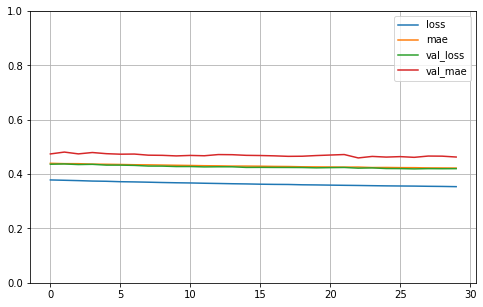

In [39]:
#plotting our model performance for visualization
pd.DataFrame(model_history.history).plot(figsize =(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
#creatingf new data to check our model prediction
X_new = X_test[0:3]

In [41]:
#predicting with new data
y_pred = model.predict(X_new)
print(y_pred) # printing model prediction value 
print(y_test[0:3]) #printing original value

[[0.7684608]
 [1.899613 ]
 [4.552379 ]]
[0.477   0.458   5.00001]
